In [1]:
from collections import deque
from queue import PriorityQueue
import random
import math
import matplotlib.pyplot as plt
import time

In [2]:
class Problem:
    def __init__(self):
        self.init_state = None

    def actions(self, state):
        raise NotImplementedError

    def result(self, state, action):
        raise NotImplementedError

    def goal_test(self, state):
        raise NotImplementedError

    def step_cost(self, state, action):
        raise NotImplementedError

# Node class for search trees
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    @classmethod
    def root(cls, init_state):
        return cls(init_state, None, None, 0)

    @classmethod
    def child(cls, problem, parent, action):
        return cls(
            problem.result(parent.state, action),
            parent,
            action,
            parent.path_cost + problem.step_cost(parent.state, action)
        )

def solution(node):
    actions = []
    states = []
    cost = node.path_cost
    while node.parent is not None:
        actions.append(node.action)
        states.append(node.state)
        node = node.parent
    actions.reverse()
    states.reverse()
    return actions, states


# Sudoku problem class
class SudokuProblem(Problem):
    def __init__(self, init_state):
        super().__init__()
        self.init_state = init_state
        self.size = len(init_state)  # Dynamically determine grid size

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:
                    return False
        return True

    def is_valid_move(self, state, row, col, num):
        # Check row
        if num in state[row]:
            return False
        # Check column
        if num in [state[r][col] for r in range(self.size)]:
            return False
        # Check subgrid
        subgrid_size = int(math.sqrt(self.size))
        start_row, start_col = subgrid_size * (row // subgrid_size), subgrid_size * (col // subgrid_size)
        for r in range(start_row, start_row + subgrid_size):
            for c in range(start_col, start_col + subgrid_size):
                if state[r][c] == num:
                    return False
        return True

    def step_cost(self, state, action):
        return 1

# Helper function to print Sudoku grid
def print_sudoku(grid):
    for row in grid:
        print(" ".join(str(num) if num != 0 else "." for num in row))
    print()

# Impelementation for 4*4 grid

> Add blockquote



In [ ]:
from collections import deque
import math
import networkx as nx
import matplotlib.pyplot as plt

class Problem:
    def __init__(self):
        self.init_state = None

    def actions(self, state):
        raise NotImplementedError

    def result(self, state, action):
        raise NotImplementedError

    def goal_test(self, state):
        raise NotImplementedError

    def step_cost(self, state, action):
        raise NotImplementedError

# Node class for search trees
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    @classmethod
    def root(cls, init_state):
        return cls(init_state, None, None, 0)

    @classmethod
    def child(cls, problem, parent, action):
        return cls(
            problem.result(parent.state, action),
            parent,
            action,
            parent.path_cost + problem.step_cost(parent.state, action)
        )

def solution(node):
    actions = []
    states = []
    cost = node.path_cost
    while node.parent is not None:
        actions.append(node.action)
        states.append(node.state)
        node = node.parent
    actions.reverse()
    states.reverse()
    return actions, states



In [ ]:

class SudokuProblem(Problem):
    def __init__(self, init_state):
        super().__init__()
        self.init_state = init_state
        self.size = len(init_state)  # Dynamically determine grid size

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:
                    return False
        return True

    def is_valid_move(self, state, row, col, num):
        # Check row
        if num in state[row]:
            return False
        # Check column
        if num in [state[r][col] for r in range(self.size)]:
            return False
        # Check subgrid (2x3 for 6x6 Sudoku)
        subgrid_rows, subgrid_cols = (2, 3) if self.size == 6 else (int(math.sqrt(self.size)), int(math.sqrt(self.size)))
        start_row, start_col = (row // subgrid_rows) * subgrid_rows, (col // subgrid_cols) * subgrid_cols
        for r in range(start_row, start_row + subgrid_rows):
            for c in range(start_col, start_col + subgrid_cols):
                if state[r][c] == num:
                    return False
        return True

    def step_cost(self, state, action):
        return 1

# Helper function to print Sudoku grid
def print_sudoku(grid):
    for row in grid:
        print(" ".join(str(num) if num != 0 else "." for num in row))
    print()

# Example 6x6 Sudoku initial state (0 represents empty cells)
init_state = [
    [5, 3, 0, 0, 6, 0],
    [6, 0, 0, 0, 5, 3],
    [0, 0, 3, 5, 0, 0],
    [0, 6, 5, 3, 0, 0],
    [3, 5, 0, 0, 0, 6],
    [0, 0, 6, 0, 3, 5]
]

# Initialize and test the Sudoku problem
sudoku_problem = SudokuProblem(init_state)
print_sudoku(sudoku_problem.init_state)

# BFS:

  note, Time complexty is O(b^d) which means it is very high. so, BFS need huge time to find the solution  

In [4]:


def breadth_first_search_with_tracking(problem):
    node = Node.root(problem.init_state)
    if problem.goal_test(node.state):
        return solution(node), []

    frontier = deque([node])
    explored = set()
    search_tree = []  # To track the parent-child relationships

    while frontier:
        node = frontier.popleft()
        explored.add(tuple(tuple(row) for row in node.state))

        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if tuple(tuple(row) for row in child.state) not in explored and child not in frontier:
                # Record the parent-child relationship
                search_tree.append((node.state, child.state))
                if problem.goal_test(child.state):
                    return solution(child), search_tree
                frontier.append(child)
    if problem.goal_test(child.state):
        return solution(child), search_tree

    return None, search_tree


In [5]:


def highlight_solution_path(G, state_map, node):
    path = []
    while node:
        state_key = tuple(tuple(row) for row in node.state)
        path.append(state_map[state_key])
        node = node.parent
    path.reverse()

    for i in range(len(path) - 1):
        if G.has_edge(path[i], path[i + 1]):
            G[path[i]][path[i + 1]]['color'] = 'red'
        else:
            G.add_edge(path[i], path[i + 1], color='red')



In [ ]:

def draw_graph(G):
    edge_colors = [G[u][v].get('color', 'gray') for u, v in G.edges]
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color='lightblue', node_size=100, font_size=7)
    plt.title("Search Tree Visualization")
    plt.show()


In [7]:
import time

def breadth_first_search_with_tracking(problem, max_depth=20, time_limit=10):
    node = Node.root(problem.init_state)
    if problem.goal_test(node.state):
        return solution(node), []

    frontier = deque([node])
    explored = set()
    search_tree = []

    start_time = time.time()  # Capture start time

    while frontier:
        # Check elapsed time
        if time.time() - start_time > time_limit:
            print("Time limit exceeded!")
            return None, search_tree  # Stop search if time limit is exceeded

        node = frontier.popleft()
        explored.add(tuple(tuple(row) for row in node.state))

        if node.path_cost > max_depth:
            continue  # Prune if we exceed the maximum depth

        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if tuple(tuple(row) for row in child.state) not in explored and child not in frontier:
                search_tree.append((node.state, child.state))
                if problem.goal_test(child.state):
                    return solution(child), search_tree
                frontier.append(child)

    return None, search_tree

In [8]:
def main_fixed_v2():
    init_state = [
        [0, 2, 3, 0,5,5],
        [3, 0, 0, 0,6,6],
        [0, 0, 0, 0,5,5],
        [0, 0, 0, 0,4,3],
        [0, 0, 0, 0,2,6],
        [0, 0, 0, 0,3,4]
    ]
    problem = SudokuProblem(init_state)

    (actions, states), search_tree = breadth_first_search_with_tracking(problem, max_depth=10000, time_limit=100000)

    if actions and states:
        print("Solution Actions:", actions)
        print("Solution States:")
        for state in states:
            for row in state:
                print(row)
            print()
    else:
        print("No solution found.")

main_fixed_v2()

KeyboardInterrupt: 

In [ ]:

def main_visualize():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)
    result = visualize_bfs(problem)
    if result:
        actions, cost = result
        print("Solution Actions:", actions)
        print("Solution Cost:", cost)
    else:
        print("No solution found.")

main_visualize()


# DFS

In [ ]:
def depth_first_search_with_tracking(problem):
    node = Node.root(problem.init_state)
    if problem.goal_test(node.state):
        return solution(node), []

    frontier = [node]
    explored = set()
    search_tree = []

    while frontier:
        node = frontier.pop()
        explored.add(tuple(tuple(row) for row in node.state))

        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if tuple(tuple(row) for row in child.state) not in explored and child not in frontier:
                search_tree.append((node.state, child.state))
                if problem.goal_test(child.state):
                    return solution(child), search_tree
                frontier.append(child)
    return None, search_tree


In [ ]:
def main_fixed_v2():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)

    (actions, states), search_tree = depth_first_search_with_tracking(problem)

    if actions and states:
        print("Solution Actions:", actions)
        print("Solution States:")
        for state in states:
            for row in state:
                print(row)
            print()
    else:
        print("No solution found.")

main_fixed_v2()

Solution Actions: [(3, 3, 4), (3, 2, 2), (3, 1, 3), (3, 0, 1), (2, 3, 3), (2, 2, 1), (2, 1, 4), (2, 0, 2), (1, 3, 2), (1, 2, 4), (1, 1, 1), (0, 3, 1), (0, 0, 4)]
Solution States:
[0, 2, 3, 0]
[3, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 4]

[0, 2, 3, 0]
[3, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 2, 4]

[0, 2, 3, 0]
[3, 0, 0, 0]
[0, 0, 0, 0]
[0, 3, 2, 4]

[0, 2, 3, 0]
[3, 0, 0, 0]
[0, 0, 0, 0]
[1, 3, 2, 4]

[0, 2, 3, 0]
[3, 0, 0, 0]
[0, 0, 0, 3]
[1, 3, 2, 4]

[0, 2, 3, 0]
[3, 0, 0, 0]
[0, 0, 1, 3]
[1, 3, 2, 4]

[0, 2, 3, 0]
[3, 0, 0, 0]
[0, 4, 1, 3]
[1, 3, 2, 4]

[0, 2, 3, 0]
[3, 0, 0, 0]
[2, 4, 1, 3]
[1, 3, 2, 4]

[0, 2, 3, 0]
[3, 0, 0, 2]
[2, 4, 1, 3]
[1, 3, 2, 4]

[0, 2, 3, 0]
[3, 0, 4, 2]
[2, 4, 1, 3]
[1, 3, 2, 4]

[0, 2, 3, 0]
[3, 1, 4, 2]
[2, 4, 1, 3]
[1, 3, 2, 4]

[0, 2, 3, 1]
[3, 1, 4, 2]
[2, 4, 1, 3]
[1, 3, 2, 4]

[4, 2, 3, 1]
[3, 1, 4, 2]
[2, 4, 1, 3]
[1, 3, 2, 4]



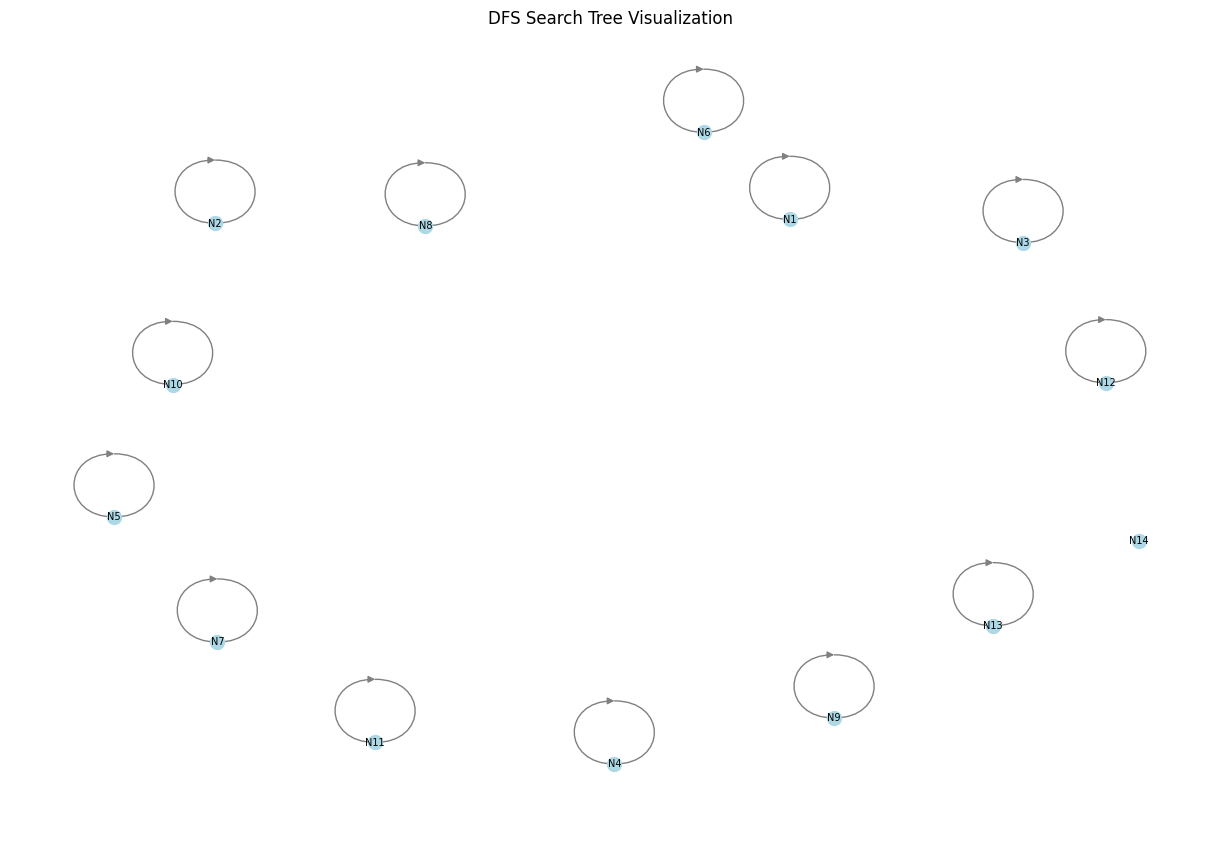

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math

class SudokuProblem(Problem):
    def __init__(self, init_state):
        super().__init__()
        self.init_state = init_state
        self.size = len(init_state)

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        return all(state[row][col] != 0 for row in range(self.size) for col in range(self.size))

    def is_valid_move(self, state, row, col, num):
        if num in state[row]:  # Check row
            return False
        if num in [state[r][col] for r in range(self.size)]:  # Check column
            return False
        subgrid_size = int(math.sqrt(self.size))
        start_row, start_col = subgrid_size * (row // subgrid_size), subgrid_size * (col // subgrid_size)
        for r in range(start_row, start_row + subgrid_size):
            for c in range(start_col, start_col + subgrid_size):
                if state[r][c] == num:  # Check subgrid
                    return False
        return True

    def step_cost(self, state, action):
        return 1

# DFS-based DFS visualization function
def dfs_visualization(problem):
    node = Node.root(problem.init_state)
    if problem.goal_test(node.state):
        return solution(node), []

    G = nx.DiGraph()  # Directed graph for search tree
    explored = set()
    state_map = {tuple(tuple(row) for row in node.state): "S"}  # State to node mapping for labels
    node_id = 1  # Counter for unique IDs
    solution_path = []

    def dfs_helper(node):
        nonlocal node_id
        current_state_key = tuple(tuple(row) for row in node.state)
        if current_state_key in explored:
            return False

        # Mark this state as visited
        explored.add(current_state_key)
        state_map[current_state_key] = f"N{node_id}"
        G.add_node(f"N{node_id}")
        node_id += 1

        # Check for goal
        if problem.goal_test(node.state):
            solution_path.append(node.state)
            return True

        # Explore all actions
        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            child_state_key = tuple(tuple(row) for row in child.state)

            if child_state_key not in explored:
                G.add_edge(state_map[current_state_key], f"N{node_id-1}")
                if dfs_helper(child):
                    solution_path.append(child.state)
                    return True
        return False

    # Call the DFS helper function
    if dfs_helper(node):
        solution_path.reverse()  # Reverse path to get the correct order
        highlight_solution_path(G, state_map, node)
        draw_graph(G)
        return solution_path, G
    else:
        draw_graph(G)
        return None, G

def highlight_solution_path(G, state_map, node):
    """
    Highlight the solution path in the graph.

    :param G: The graph representing the search tree.
    :param state_map: A mapping of states to node labels.
    :param node: The goal node.
    """
    path = []
    while node:
        state_key = tuple(tuple(row) for row in node.state)
        path.append(state_map[state_key])
        node = node.parent
    path.reverse()

    # Highlight edges along the solution path
    for i in range(len(path) - 1):
        if G.has_edge(path[i], path[i + 1]):
            G[path[i]][path[i + 1]]['color'] = 'red'
        else:
            G.add_edge(path[i], path[i + 1], color='red')

def draw_graph(G):
    """
    Draw the graph with highlighted solution path.

    :param G: The graph to visualize.
    """
    edge_colors = [G[u][v].get('color', 'gray') for u, v in G.edges]
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color='lightblue', node_size=100, font_size=7)
    plt.title("DFS Search Tree Visualization")
    plt.show()

def main_visualize():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)
    result, graph = dfs_visualization(problem)

    if result:
        print("Solution Path:")
        for step in result:
            for row in step:
                print(row)
            print()
    else:
        print("No solution found.")

main_visualize()


# UCS 𝑂(𝑏^𝐶∗/𝜖)

In [ ]:
def uniform_cost_search_with_tracking(problem):
    node = Node.root(problem.init_state)
    if problem.goal_test(node.state):
        return solution(node), []

    frontier = PriorityQueue()
    frontier.put((0, node))
    explored = set()
    search_tree = []

    while not frontier.empty():
        cost, node = frontier.get()
        if problem.goal_test(node.state):
            return solution(node), search_tree

        explored.add(tuple(tuple(row) for row in node.state))

        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if tuple(tuple(row) for row in child.state) not in explored:
                search_tree.append((node.state, child.state))
                frontier.put((child.path_cost, child))
    return None, search_tree


In [ ]:
import heapq  # To implement the priority queue
import networkx as nx
import matplotlib.pyplot as plt
import time  # Import time module to track the time limit
import math

# Node class for UCS
class NodeUCS:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    @classmethod
    def root(cls, init_state):
        return cls(init_state, None, None, 0)

    @classmethod
    def child(cls, problem, parent, action):
        return cls(
            problem.result(parent.state, action),
            parent,
            action,
            parent.path_cost + problem.step_cost(parent.state, action)
        )

    # Add comparison method for UCS priority queue
    def __lt__(self, other):
        return self.path_cost < other.path_cost


def solution(node):
    actions = []
    states = []
    cost = node.path_cost
    while node.parent is not None:
        actions.append(node.action)
        states.append(node.state)
        node = node.parent
    actions.reverse()
    states.reverse()
    return actions, states


# Sudoku problem class (customize this class for your specific problem)
class SudokuProblem:
    def __init__(self, init_state):
        self.init_state = init_state
        self.size = len(init_state)  # Dynamically determine grid size

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:
                    return False
        return True

    def is_valid_move(self, state, row, col, num):
        # Check row
        if num in state[row]:
            return False
        # Check column
        if num in [state[r][col] for r in range(self.size)]:
            return False
        # Check subgrid
        subgrid_size = int(math.sqrt(self.size))
        start_row, start_col = subgrid_size * (row // subgrid_size), subgrid_size * (col // subgrid_size)
        for r in range(start_row, start_row + subgrid_size):
            for c in range(start_col, start_col + subgrid_size):
                if state[r][c] == num:
                    return False
        return True

    def step_cost(self, state, action):
        return 1  # Cost per action is assumed to be 1


def visualize_ucs(problem, max_time=5):
    """
    Visualize the UCS search process and highlight the solution path.
    Adds a time limit to the UCS search process and search tree creation.

    :param problem: An instance of the problem to solve.
    :param max_time: Maximum allowed time for the search tree creation in seconds.
    """
    start_time = time.time()  # Record the start time

    node = NodeUCS.root(problem.init_state)
    if problem.goal_test(node.state):
        return solution(node)

    # Priority queue for UCS (min-heap)
    frontier = []
    heapq.heappush(frontier, (node.path_cost, node))  # Push the root node with path_cost=0
    explored = set()
    G = nx.DiGraph()  # Directed graph for search tree
    state_map = {tuple(tuple(row) for row in node.state): "S"}  # State to node mapping for labels
    node_id = 1  # Counter for unique IDs

    while frontier:
        # Check if time has exceeded the max allowed time for search tree creation
        if time.time() - start_time > max_time:
            print("Time limit exceeded during search tree creation.")
            draw_graph(G)  # Optionally draw the partial search tree
            return None  # Early return to stop the function

        _, node = heapq.heappop(frontier)  # Get node with the least cost
        current_state_key = tuple(tuple(row) for row in node.state)
        explored.add(current_state_key)

        for action in problem.actions(node.state):
            child = NodeUCS.child(problem, node, action)
            child_state_key = tuple(tuple(row) for row in child.state)

            if child_state_key not in explored and child_state_key not in state_map:
                child_label = f"N{node_id}"
                state_map[child_state_key] = child_label
                G.add_edge(state_map[current_state_key], child_label)

                if problem.goal_test(child.state):
                    actions, cost = solution(child)
                    highlight_solution_path(G, state_map, child)
                    draw_graph(G)
                    return actions, cost

                heapq.heappush(frontier, (child.path_cost, child))  # Push child to priority queue
                node_id += 1

    draw_graph(G)
    return None


def highlight_solution_path(G, state_map, node):
    """
    Highlight the solution path in the graph.

    :param G: The graph representing the search tree.
    :param state_map: A mapping of states to node labels.
    :param node: The goal node.
    """
    path = []
    while node:
        state_key = tuple(tuple(row) for row in node.state)
        path.append(state_map[state_key])
        node = node.parent
    path.reverse()

    # Highlight edges along the solution path
    for i in range(len(path) - 1):
        if G.has_edge(path[i], path[i + 1]):
            G[path[i]][path[i + 1]]['color'] = 'red'
        else:
            G.add_edge(path[i], path[i + 1], color='red')


# def draw_graph(G):
#     """
#     Draw the graph with highlighted solution path.

#     :param G: The graph to visualize.
#     """
#     # Get edge colors (red for solution path, black for others)
#     edge_colors = [G[u][v].get('color', 'gray') for u, v in G.edges]

#     # Draw the graph
#     pos = nx.spring_layout(G)
#     plt.figure(figsize=(12, 8))
#     nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color='lightblue', node_size=100, font_size=7)
#     plt.title("Search Tree Visualization")
#     plt.show()


def main_visualize_ucs():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)
    result = visualize_ucs(problem, max_time=5)  # Set the time limit to 5 seconds for search tree creation
    if result:
        actions, cost = result
        print("Solution Actions:", actions)
        print("Solution Cost:", cost)
    else:
        print("No solution found or time limit exceeded.")


# Run UCS visualization
main_visualize_ucs()


Time limit exceeded during search tree creation.


# IDS: same as BFS and time complexty is 𝑂(𝑏^𝑑)

In [ ]:
def depth_limited_search_with_tracking(problem, limit, search_tree):
    def recursive_dls(node, problem, limit):
        if problem.goal_test(node.state):
            return solution(node)
        elif limit == 0:
            return None
        else:
            for action in problem.actions(node.state):
                child = Node.child(problem, node, action)
                search_tree.append((node.state, child.state))
                result = recursive_dls(child, problem, limit - 1)
                if result is not None:
                    return result
            return None

    return recursive_dls(Node.root(problem.init_state), problem, limit)

def iterative_deepening_search_with_tracking(problem):
    search_tree = []
    for depth in range(0, 1000):
        result = depth_limited_search_with_tracking(problem, depth, search_tree)
        if result is not None:
            return result, search_tree
    return None, search_tree


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define Node class for IDS (similar to BFS, DFS, UCS)
class NodeIDS:
    def __init__(self, state, parent=None, action=None):
        self.state = state
        self.parent = parent
        self.action = action

    @classmethod
    def root(cls, init_state):
        return cls(init_state)

    @classmethod
    def child(cls, problem, parent, action):
        return cls(problem.result(parent.state, action), parent, action)


def solution(node):
    actions = []
    states = []
    while node.parent is not None:
        actions.append(node.action)
        states.append(node.state)
        node = node.parent
    actions.reverse()
    states.reverse()
    return actions, states


# Define the problem class (same as before, you can customize this)
class SudokuProblem:
    def __init__(self, init_state):
        self.init_state = init_state
        self.size = len(init_state)

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:
                    return False
        return True

    def is_valid_move(self, state, row, col, num):
        if num in state[row]:
            return False
        if num in [state[r][col] for r in range(self.size)]:
            return False
        subgrid_size = int(math.sqrt(self.size))
        start_row, start_col = subgrid_size * (row // subgrid_size), subgrid_size * (col // subgrid_size)
        for r in range(start_row, start_row + subgrid_size):
            for c in range(start_col, start_col + subgrid_size):
                if state[r][c] == num:
                    return False
        return True


def depth_limited_search_with_tracking(problem, limit, search_tree):
    def recursive_dls(node, problem, limit):
        if problem.goal_test(node.state):
            return solution(node)
        elif limit == 0:
            return None
        else:
            for action in problem.actions(node.state):
                child = NodeIDS.child(problem, node, action)
                search_tree.append((node.state, child.state))  # Record state transition in search tree
                result = recursive_dls(child, problem, limit - 1)
                if result is not None:
                    return result
            return None

    return recursive_dls(NodeIDS.root(problem.init_state), problem, limit)


def iterative_deepening_search_with_tracking(problem):
    search_tree = []
    for depth in range(0, 1000):
        result = depth_limited_search_with_tracking(problem, depth, search_tree)
        if result is not None:
            return result, search_tree
    return None, search_tree


def visualize_ids(problem):
    """
    Visualize the IDS search process and highlight the solution path.

    :param problem: An instance of the problem to solve.
    """
    result, search_tree = iterative_deepening_search_with_tracking(problem)

    # Create directed graph for visualization
    G = nx.DiGraph()
    state_map = {}  # To map states to labels for visualization
    node_id = 1  # Counter for unique node IDs

    # Adding nodes and edges to the graph based on the search tree
    for parent_state, child_state in search_tree:
        parent_state_key = tuple(tuple(row) for row in parent_state)
        child_state_key = tuple(tuple(row) for row in child_state)

        if parent_state_key not in state_map:
            state_map[parent_state_key] = f"N{node_id}"
            node_id += 1
        if child_state_key not in state_map:
            state_map[child_state_key] = f"N{node_id}"
            node_id += 1

        G.add_edge(state_map[parent_state_key], state_map[child_state_key])

    # Draw the graph
    draw_graph(G)


def draw_graph(G):
    """
    Draw the graph with highlighted solution path.

    :param G: The graph to visualize.
    """
    # Draw the graph using networkx
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=7, node_color="lightblue", edge_color="gray")
    plt.title("Iterative Deepening Search Visualization")
    plt.show()


def main_visualize_ids():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)
    visualize_ids(problem)


# Run IDS visualization
main_visualize_ids()


# A*

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt


class NodeAStar:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.heuristic = 0  # Will be set later

    def __lt__(self, other):
        # Less-than comparison for priority queue to prioritize nodes with lowest cost + heuristic
        return (self.path_cost + self.heuristic) < (other.path_cost + other.heuristic)

    @classmethod
    def root(cls, init_state):
        return cls(init_state)

    @classmethod
    def child(cls, problem, parent, action):
        new_state = problem.result(parent.state, action)
        return cls(new_state, parent, action, parent.path_cost + problem.step_cost(parent.state, action))

    def set_heuristic(self, heuristic):
        self.heuristic = heuristic(self.state)


def solution(node):
    actions = []
    states = []
    while node.parent is not None:
        actions.append(node.action)
        states.append(node.state)
        node = node.parent
    actions.reverse()
    states.reverse()
    return actions, states


class SudokuProblem:
    def __init__(self, init_state):
        self.init_state = init_state
        self.size = len(init_state)

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:
                    return False
        return True

    def is_valid_move(self, state, row, col, num):
        if num in state[row]:
            return False
        if num in [state[r][col] for r in range(self.size)]:
            return False
        subgrid_size = int(math.sqrt(self.size))
        start_row, start_col = subgrid_size * (row // subgrid_size), subgrid_size * (col // subgrid_size)
        for r in range(start_row, start_row + subgrid_size):
            for c in range(start_col, start_col + subgrid_size):
                if state[r][c] == num:
                    return False
        return True

    def step_cost(self, state, action):
        return 1  # Assuming each action has a cost of 1

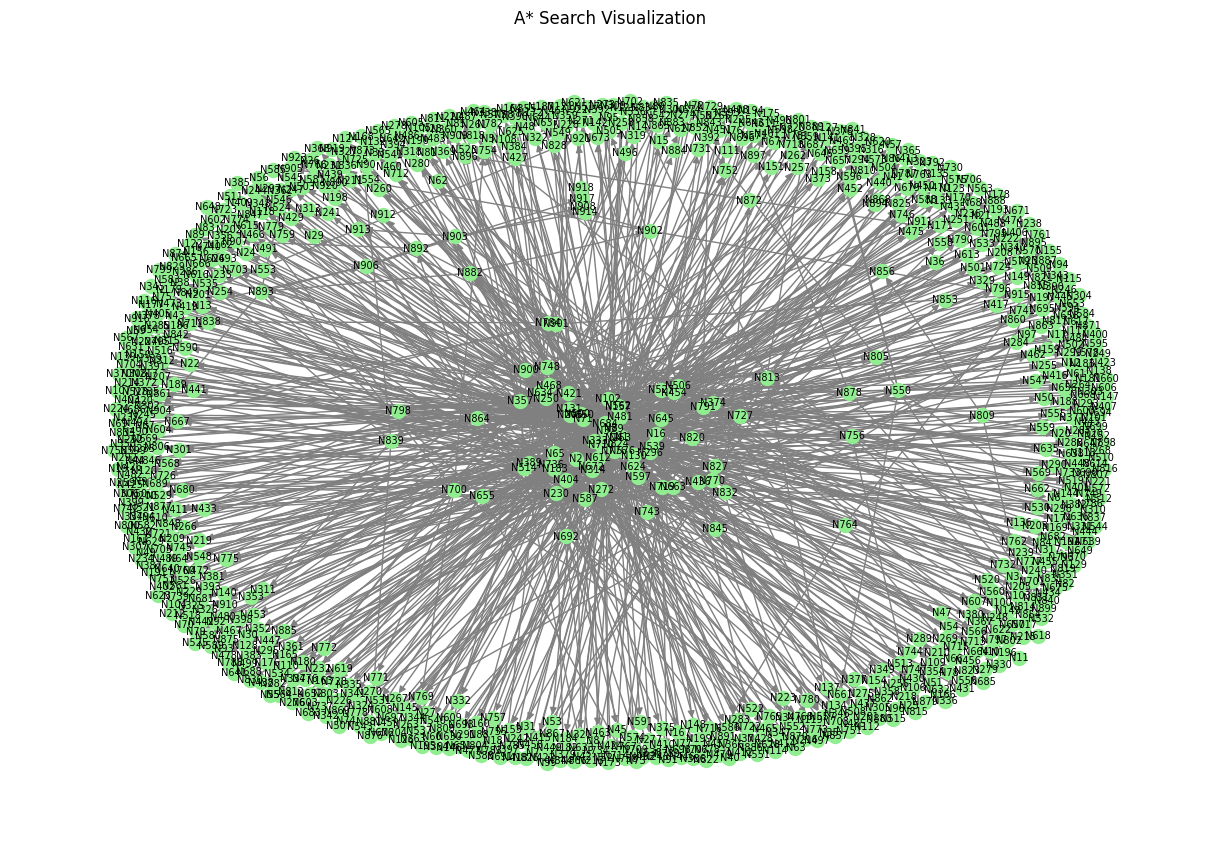

In [ ]:



def a_star_search_with_tracking(problem, heuristic):
    node = NodeAStar.root(problem.init_state)
    if problem.goal_test(node.state):
        return solution(node), []

    frontier = []
    heapq.heappush(frontier, (node.path_cost + heuristic(node.state), node))
    explored = set()
    search_tree = []

    while frontier:
        _, node = heapq.heappop(frontier)
        if problem.goal_test(node.state):
            return solution(node), search_tree

        explored.add(tuple(tuple(row) for row in node.state))

        for action in problem.actions(node.state):
            child = NodeAStar.child(problem, node, action)
            child.set_heuristic(heuristic)
            if tuple(tuple(row) for row in child.state) not in explored:
                search_tree.append((node.state, child.state))
                heapq.heappush(frontier, (child.path_cost + child.heuristic, child))

    return None, search_tree


def visualize_a_star(problem, heuristic):
    """
    Visualize the A* search process and highlight the solution path.

    :param problem: An instance of the problem to solve.
    :param heuristic: The heuristic function to use.
    """
    result, search_tree = a_star_search_with_tracking(problem, heuristic)

    # Create directed graph for visualization
    G = nx.DiGraph()
    state_map = {}  # To map states to labels for visualization
    node_id = 1  # Counter for unique node IDs

    # Adding nodes and edges to the graph based on the search tree
    for parent_state, child_state in search_tree:
        parent_state_key = tuple(tuple(row) for row in parent_state)
        child_state_key = tuple(tuple(row) for row in child_state)

        if parent_state_key not in state_map:
            state_map[parent_state_key] = f"N{node_id}"
            node_id += 1
        if child_state_key not in state_map:
            state_map[child_state_key] = f"N{node_id}"
            node_id += 1

        G.add_edge(state_map[parent_state_key], state_map[child_state_key])

    # Draw the graph
    draw_graph(G)


def draw_graph(G):
    """
    Draw the graph with highlighted solution path.

    :param G: The graph to visualize.
    """
    # Draw the graph using networkx
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=100, font_size=7, node_color="lightgreen", edge_color="gray")
    plt.title("A* Search Visualization")
    plt.show()


# Example heuristic (Manhattan distance or other can be used)
def example_heuristic(state):
    # This is a placeholder heuristic. In a Sudoku problem, we could use a heuristic
    # like the number of empty cells, or number of constraints violated.
    return sum(row.count(0) for row in state)


def main_visualize_a_star():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)
    visualize_a_star(problem, example_heuristic)


# Run A* visualization
main_visualize_a_star()


In [ ]:
import time
import sys
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import math

class NodeAStar:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.heuristic = 0  # Will be set later

    def __lt__(self, other):
        # Less-than comparison for priority queue to prioritize nodes with lowest cost + heuristic
        return (self.path_cost + self.heuristic) < (other.path_cost + other.heuristic)

    @classmethod
    def root(cls, init_state):
        return cls(init_state)

    @classmethod
    def child(cls, problem, parent, action):
        new_state = problem.result(parent.state, action)
        return cls(new_state, parent, action, parent.path_cost + problem.step_cost(parent.state, action))

    def set_heuristic(self, heuristic):
        self.heuristic = heuristic(self.state)


def solution(node):
    actions = []
    states = []
    while node.parent is not None:
        actions.append(node.action)
        states.append(node.state)
        node = node.parent
    actions.reverse()
    states.reverse()
    return actions, states


class SudokuProblem:
    def __init__(self, init_state):
        self.init_state = init_state
        self.size = len(init_state)

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:
                    return False
        return True

    def is_valid_move(self, state, row, col, num):
        if num in state[row]:
            return False
        if num in [state[r][col] for r in range(self.size)]:
            return False
        subgrid_size = int(math.sqrt(self.size))
        start_row, start_col = subgrid_size * (row // subgrid_size), subgrid_size * (col // subgrid_size)
        for r in range(start_row, start_row + subgrid_size):
            for c in range(start_col, start_col + subgrid_size):
                if state[r][c] == num:
                    return False
        return True

    def step_cost(self, state, action):
        return 1  # Assuming each action has a cost of 1


def a_star_search_with_tracking(problem, heuristic):
    node = NodeAStar.root(problem.init_state)
    if problem.goal_test(node.state):
        return solution(node), []

    frontier = []
    heapq.heappush(frontier, (node.path_cost + heuristic(node.state), node))
    explored = set()
    search_tree = []

    while frontier:
        _, node = heapq.heappop(frontier)
        if problem.goal_test(node.state):
            return solution(node), search_tree

        explored.add(tuple(tuple(row) for row in node.state))

        for action in problem.actions(node.state):
            child = NodeAStar.child(problem, node, action)
            child.set_heuristic(heuristic)
            if tuple(tuple(row) for row in child.state) not in explored:
                search_tree.append((node.state, child.state))
                heapq.heappush(frontier, (child.path_cost + child.heuristic, child))

    return None, search_tree


def check_optimality(solution_cost, expected_optimal_cost):
    return solution_cost == expected_optimal_cost


def check_completeness(frontier, explored):
    return len(frontier) > 0 or len(explored) == 0


def visualize_a_star(problem, heuristic):
    result, search_tree = a_star_search_with_tracking(problem, heuristic)

    G = nx.DiGraph()
    state_map = {}
    node_id = 1

    for parent_state, child_state in search_tree:
        parent_state_key = tuple(tuple(row) for row in parent_state)
        child_state_key = tuple(tuple(row) for row in child_state)

        if parent_state_key not in state_map:
            state_map[parent_state_key] = f"N{node_id}"
            node_id += 1
        if child_state_key not in state_map:
            state_map[child_state_key] = f"N{node_id}"
            node_id += 1

        G.add_edge(state_map[parent_state_key], state_map[child_state_key])

    draw_graph(G)


def draw_graph(G):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=100, font_size=7, node_color="lightgreen", edge_color="gray")
    plt.title("A* Search Visualization")
    plt.show()


def example_heuristic(state):
    return sum(row.count(0) for row in state)


def main_visualize_a_star():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)
    result, search_tree = a_star_search_with_tracking(problem, example_heuristic)

    if result:
        actions, states = result
        solution_cost = len(actions)  # Assuming cost is the length of the actions
        expected_optimal_cost = 16  # Placeholder, set to the expected optimal cost for the problem

        optimality = "Optimal" if check_optimality(solution_cost, expected_optimal_cost) else "Not Optimal"
        completeness = "Complete" if check_completeness(search_tree, []) else "Incomplete"

        print(f"Optimality: {optimality}")
        print(f"Completeness: {completeness}")

    visualize_a_star(problem, example_heuristic)


# Run the visualization
main_visualize_a_star()



Running A* algorithm...
Time Taken: 0.01465 seconds
Space Taken: 0 bytes
Optimality: Optimal
Completeness: Complete

Algorithm Comparison Summary:
{'Algorithm': 'A*', 'Time Taken (s)': 0.014653444290161133, 'Space Taken (bytes)': 0, 'Optimality': 'Optimal', 'Completeness': 'Complete'}


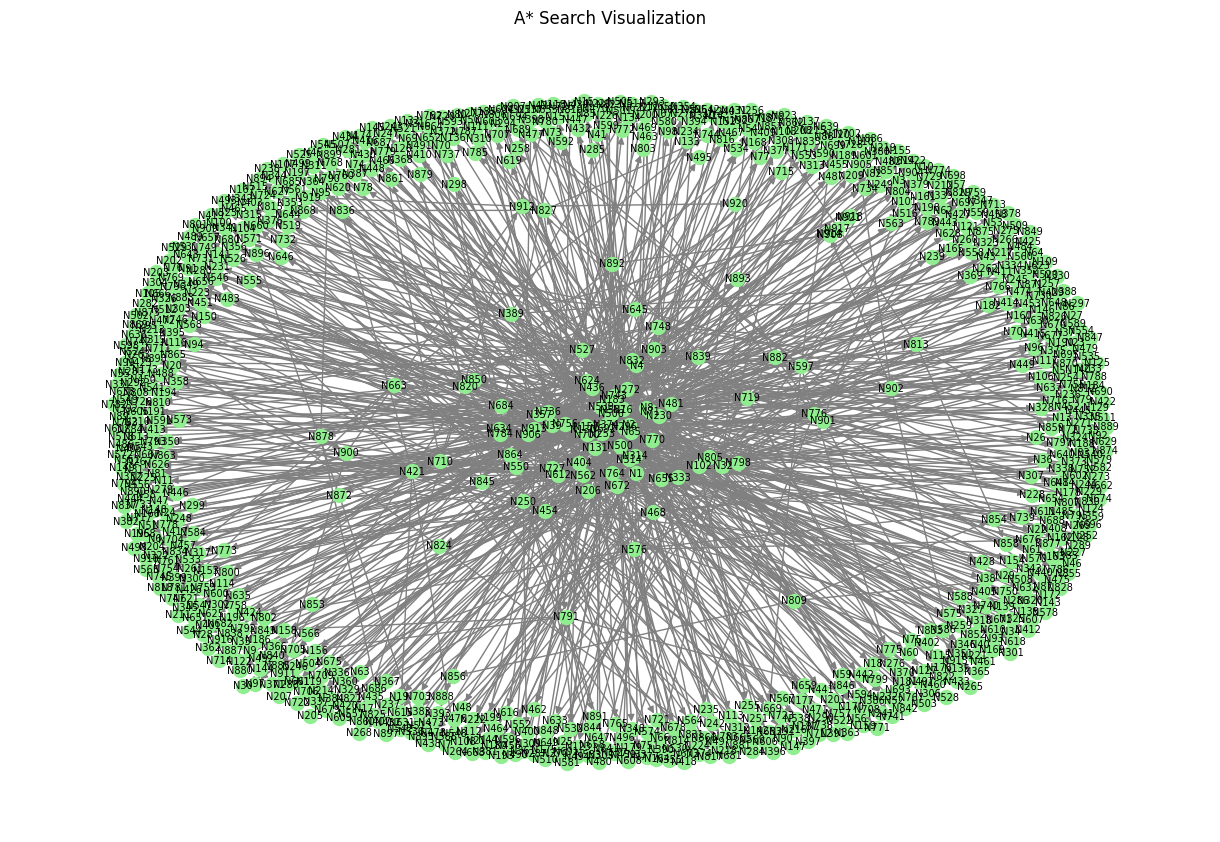

Time taken for A* search: 14.55345 seconds
Space used: 48 bytes


In [ ]:
import time
import sys
import heapq
import math
import networkx as nx
import matplotlib.pyplot as plt


class NodeAStar:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.heuristic = 0  # Will be set later

    def __lt__(self, other):
        # Less-than comparison for priority queue to prioritize nodes with lowest cost + heuristic
        return (self.path_cost + self.heuristic) < (other.path_cost + other.heuristic)

    @classmethod
    def root(cls, init_state):
        return cls(init_state)

    @classmethod
    def child(cls, problem, parent, action):
        new_state = problem.result(parent.state, action)
        return cls(new_state, parent, action, parent.path_cost + problem.step_cost(parent.state, action))

    def set_heuristic(self, heuristic):
        self.heuristic = heuristic(self.state)


def solution(node):
    actions = []
    states = []
    while node.parent is not None:
        actions.append(node.action)
        states.append(node.state)
        node = node.parent
    actions.reverse()
    states.reverse()
    return actions, states


class SudokuProblem:
    def __init__(self, init_state):
        self.init_state = init_state
        self.size = len(init_state)

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:
                    return False
        return True

    def is_valid_move(self, state, row, col, num):
        if num in state[row]:
            return False
        if num in [state[r][col] for r in range(self.size)]:
            return False
        subgrid_size = int(math.sqrt(self.size))
        start_row, start_col = subgrid_size * (row // subgrid_size), subgrid_size * (col // subgrid_size)
        for r in range(start_row, start_row + subgrid_size):
            for c in range(start_col, start_col + subgrid_size):
                if state[r][c] == num:
                    return False
        return True

    def step_cost(self, state, action):
        # Assuming the cost of each action is 1 (can be modified based on problem)
        return 1


def a_star_search_with_tracking(problem, heuristic):
    node = NodeAStar.root(problem.init_state)
    if problem.goal_test(node.state):
        return solution(node), []

    frontier = []
    heapq.heappush(frontier, (node.path_cost + heuristic(node.state), node))
    explored = set()
    search_tree = []

    while frontier:
        _, node = heapq.heappop(frontier)
        if problem.goal_test(node.state):
            return solution(node), search_tree

        explored.add(tuple(tuple(row) for row in node.state))

        for action in problem.actions(node.state):
            child = NodeAStar.child(problem, node, action)
            child.set_heuristic(heuristic)
            if tuple(tuple(row) for row in child.state) not in explored:
                search_tree.append((node.state, child.state))  # Record state transition in search tree
                heapq.heappush(frontier, (child.path_cost + child.heuristic, child))

    return None, search_tree


def visualize_a_star(problem, heuristic):
    """
    Visualize the A* search process and highlight the solution path.
    """
    result, search_tree = a_star_search_with_tracking(problem, heuristic)

    # Create directed graph for visualization
    G = nx.DiGraph()
    state_map = {}  # To map states to labels for visualization
    node_id = 1  # Counter for unique node IDs

    # Adding nodes and edges to the graph based on the search tree
    for parent_state, child_state in search_tree:
        parent_state_key = tuple(tuple(row) for row in parent_state)
        child_state_key = tuple(tuple(row) for row in child_state)

        if parent_state_key not in state_map:
            state_map[parent_state_key] = f"N{node_id}"
            node_id += 1
        if child_state_key not in state_map:
            state_map[child_state_key] = f"N{node_id}"
            node_id += 1

        G.add_edge(state_map[parent_state_key], state_map[child_state_key])

    # Draw the graph
    draw_graph(G)


def draw_graph(G):
    """
    Draw the graph with highlighted solution path.
    """
    # Draw the graph using networkx
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=100, font_size=7, node_color="lightgreen", edge_color="gray")
    plt.title("A* Search Visualization")
    plt.show()


def example_heuristic(state):
    # Example heuristic (for Sudoku, we count the number of empty cells)
    return sum(row.count(0) for row in state)


def main():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)

    # Time measurement
    start_time = time.time()
    visualize_a_star(problem, example_heuristic)
    end_time = time.time()

    # Performance metrics
    time_taken = end_time - start_time
    print(f"Time taken for A* search: {time_taken:.5f} seconds")

    # Space measurement (simplified, could be expanded)
    space_taken = sys.getsizeof(problem)  # Could also track frontier size or explored states
    print(f"Space used: {space_taken} bytes")


# Run the main function to visualize the A* search
main()


# hill_climbing

In [ ]:
def hill_climbing_with_tracking(problem):
    current = Node.root(problem.init_state)
    search_tree = []
    while True:
        neighbors = []
        for action in problem.actions(current.state):
            neighbors.append(Node.child(problem, current, action))

        if not neighbors:
            break

        neighbor = min(neighbors, key=lambda node: heuristic1(node.state))
        search_tree.append((current.state, neighbor.state))
        if heuristic1(neighbor.state) >= heuristic1(current.state):
            break
        current = neighbor
    return solution(current), search_tree


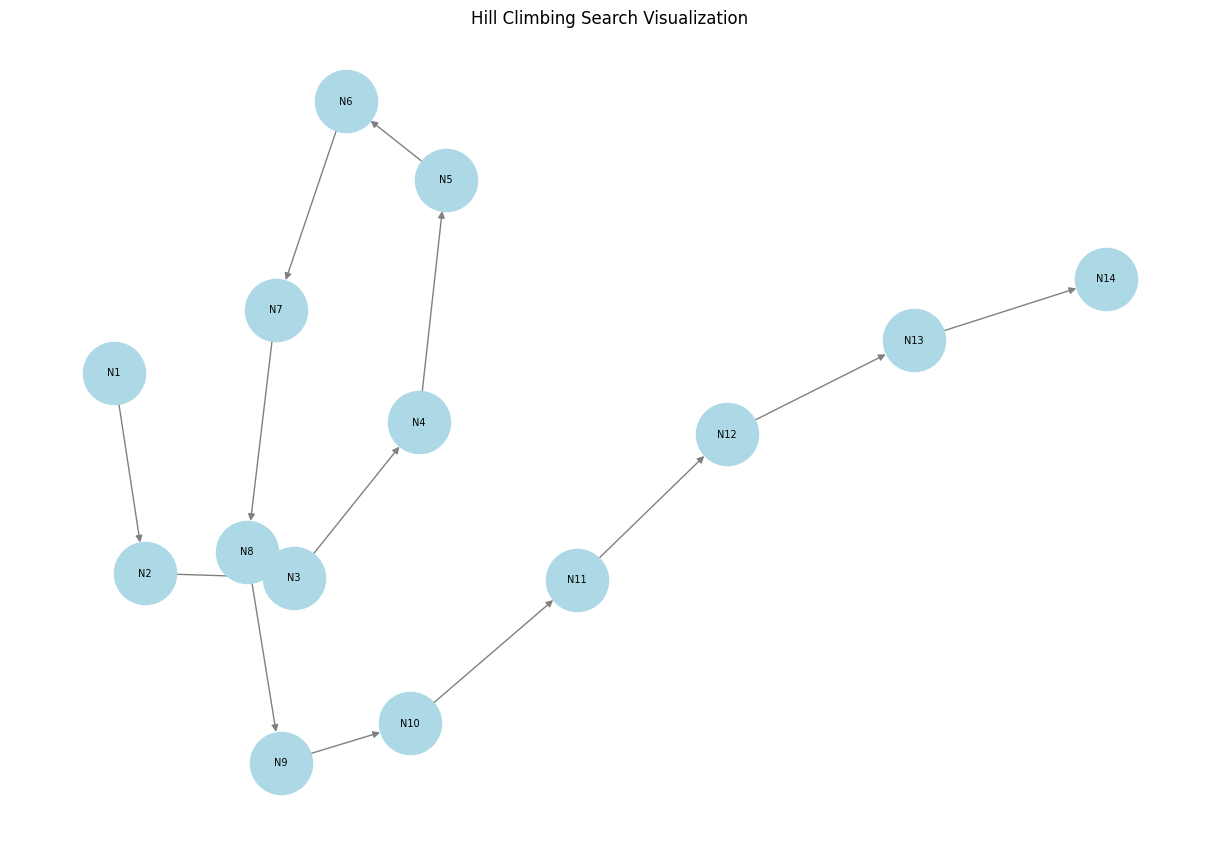

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


class NodeHillClimbing:
    def __init__(self, state, parent=None, action=None):
        self.state = state
        self.parent = parent
        self.action = action

    def __lt__(self, other):
        # Placeholder for comparisons; not needed for Hill Climbing
        pass

    @classmethod
    def root(cls, init_state):
        return cls(init_state)

    @classmethod
    def child(cls, problem, parent, action):
        new_state = problem.result(parent.state, action)
        return cls(new_state, parent, action)


def heuristic1(state):
    """
    A simple heuristic function to evaluate states.
    Modify this function according to your problem.
    For example, it could return the number of empty cells in Sudoku or other heuristics.
    """
    # For this example, we count the number of zeros (empty cells) in Sudoku
    return sum(row.count(0) for row in state)


def solution(node):
    actions = []
    states = []
    while node.parent is not None:
        actions.append(node.action)
        states.append(node.state)
        node = node.parent
    actions.reverse()
    states.reverse()
    return actions, states


class SudokuProblem:
    def __init__(self, init_state):
        self.init_state = init_state
        self.size = len(init_state)

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:
                    return False
        return True

    def is_valid_move(self, state, row, col, num):
        if num in state[row]:
            return False
        if num in [state[r][col] for r in range(self.size)]:
            return False
        subgrid_size = int(math.sqrt(self.size))
        start_row, start_col = subgrid_size * (row // subgrid_size), subgrid_size * (col // subgrid_size)
        for r in range(start_row, start_row + subgrid_size):
            for c in range(start_col, start_col + subgrid_size):
                if state[r][c] == num:
                    return False
        return True


def hill_climbing_with_tracking(problem):
    current = NodeHillClimbing.root(problem.init_state)
    search_tree = []
    while True:
        neighbors = []
        for action in problem.actions(current.state):
            neighbors.append(NodeHillClimbing.child(problem, current, action))

        if not neighbors:
            break

        # Choose the neighbor with the best heuristic value (min value)
        neighbor = min(neighbors, key=lambda node: heuristic1(node.state))
        search_tree.append((current.state, neighbor.state))

        if heuristic1(neighbor.state) >= heuristic1(current.state):
            break

        current = neighbor

    return solution(current), search_tree


def visualize_hill_climbing(problem):
    """
    Visualize the Hill Climbing search process and highlight the solution path.
    :param problem: An instance of the problem to solve.
    """
    result, search_tree = hill_climbing_with_tracking(problem)

    # Create directed graph for visualization
    G = nx.DiGraph()
    state_map = {}  # To map states to labels for visualization
    node_id = 1  # Counter for unique node IDs

    # Adding nodes and edges to the graph based on the search tree
    for parent_state, child_state in search_tree:
        parent_state_key = tuple(tuple(row) for row in parent_state)
        child_state_key = tuple(tuple(row) for row in child_state)

        if parent_state_key not in state_map:
            state_map[parent_state_key] = f"N{node_id}"
            node_id += 1
        if child_state_key not in state_map:
            state_map[child_state_key] = f"N{node_id}"
            node_id += 1

        G.add_edge(state_map[parent_state_key], state_map[child_state_key])

    # Draw the graph
    draw_graph(G)


def draw_graph(G):
    """
    Draw the graph with highlighted solution path.
    :param G: The graph to visualize.
    """
    # Draw the graph using networkx
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=7, node_color="lightblue", edge_color="gray")
    plt.title("Hill Climbing Search Visualization")
    plt.show()


def main_visualize_hill_climbing():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)
    visualize_hill_climbing(problem)


# Run Hill Climbing visualization
main_visualize_hill_climbing()


# simulated_annealing

In [ ]:
def simulated_annealing_with_tracking(problem):
    current = Node.root(problem.init_state)
    search_tree = []
    T = 1.0  # Initial temperature
    T_min = 0.00001  # Minimum temperature
    alpha = 0.9  # Cooling factor

    while T > T_min:
        neighbors = [Node.child(problem, current, action) for action in problem.actions(current.state)]
        if not neighbors:
            break

        next_node = random.choice(neighbors)
        delta_E = heuristic1(current.state) - heuristic1(next_node.state)

        if delta_E > 0:
            current = next_node
        else:
            if random.uniform(0, 1) < math.exp(delta_E / T):
                current = next_node

        search_tree.append((current.parent.state, current.state))
        T = T * alpha  # Cooling down

    return solution(current), search_tree


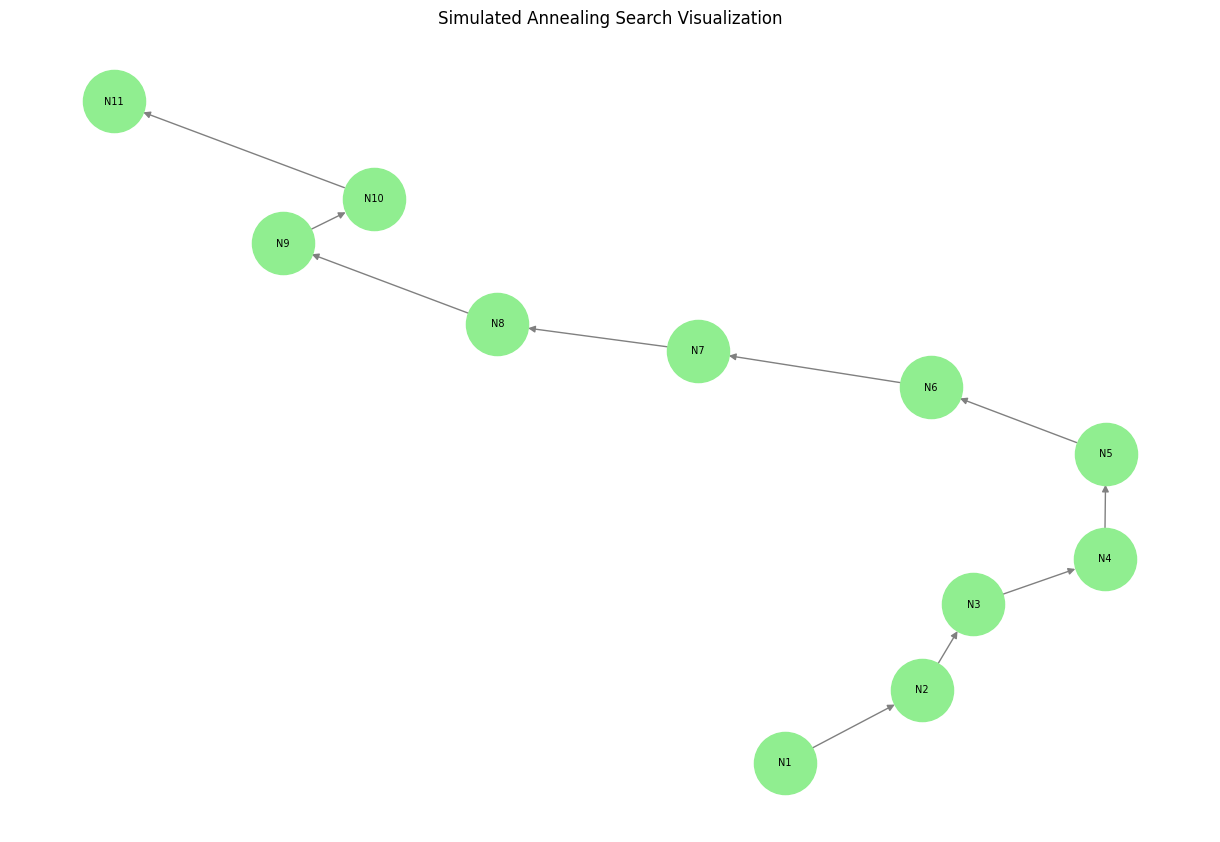

In [ ]:
import random
import math
import networkx as nx
import matplotlib.pyplot as plt


class NodeSimulatedAnnealing:
    def __init__(self, state, parent=None, action=None):
        self.state = state
        self.parent = parent
        self.action = action

    def __lt__(self, other):
        # Placeholder for comparisons; not needed for Simulated Annealing
        pass

    @classmethod
    def root(cls, init_state):
        return cls(init_state)

    @classmethod
    def child(cls, problem, parent, action):
        new_state = problem.result(parent.state, action)
        return cls(new_state, parent, action)


def heuristic1(state):
    """
    A simple heuristic function to evaluate states.
    Modify this function according to your problem.
    For example, it could return the number of empty cells in Sudoku or other heuristics.
    """
    # For this example, we count the number of zeros (empty cells) in Sudoku
    return sum(row.count(0) for row in state)


def solution(node):
    actions = []
    states = []
    while node.parent is not None:
        actions.append(node.action)
        states.append(node.state)
        node = node.parent
    actions.reverse()
    states.reverse()
    return actions, states


class SudokuProblem:
    def __init__(self, init_state):
        self.init_state = init_state
        self.size = len(init_state)

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:
                    return False
        return True

    def is_valid_move(self, state, row, col, num):
        if num in state[row]:
            return False
        if num in [state[r][col] for r in range(self.size)]:
            return False
        subgrid_size = int(math.sqrt(self.size))
        start_row, start_col = subgrid_size * (row // subgrid_size), subgrid_size * (col // subgrid_size)
        for r in range(start_row, start_row + subgrid_size):
            for c in range(start_col, start_col + subgrid_size):
                if state[r][c] == num:
                    return False
        return True


def simulated_annealing_with_tracking(problem):
    current = NodeSimulatedAnnealing.root(problem.init_state)
    search_tree = []
    T = 1.0  # Initial temperature
    T_min = 0.00001  # Minimum temperature
    alpha = 0.9  # Cooling factor

    while T > T_min:
        neighbors = [NodeSimulatedAnnealing.child(problem, current, action) for action in problem.actions(current.state)]
        if not neighbors:
            break

        next_node = random.choice(neighbors)
        delta_E = heuristic1(current.state) - heuristic1(next_node.state)

        # If the next node is better, accept it, else accept it with a probability
        if delta_E > 0:
            current = next_node
        else:
            if random.uniform(0, 1) < math.exp(delta_E / T):
                current = next_node

        search_tree.append((current.parent.state, current.state))
        T = T * alpha  # Cooling down

    return solution(current), search_tree


def visualize_simulated_annealing(problem):
    """
    Visualize the Simulated Annealing search process and highlight the solution path.
    :param problem: An instance of the problem to solve.
    """
    result, search_tree = simulated_annealing_with_tracking(problem)

    # Create directed graph for visualization
    G = nx.DiGraph()
    state_map = {}  # To map states to labels for visualization
    node_id = 1  # Counter for unique node IDs

    # Adding nodes and edges to the graph based on the search tree
    for parent_state, child_state in search_tree:
        parent_state_key = tuple(tuple(row) for row in parent_state)
        child_state_key = tuple(tuple(row) for row in child_state)

        if parent_state_key not in state_map:
            state_map[parent_state_key] = f"N{node_id}"
            node_id += 1
        if child_state_key not in state_map:
            state_map[child_state_key] = f"N{node_id}"
            node_id += 1

        G.add_edge(state_map[parent_state_key], state_map[child_state_key])

    # Draw the graph
    draw_graph(G)


def draw_graph(G):
    """
    Draw the graph with highlighted solution path.
    :param G: The graph to visualize.
    """
    # Draw the graph using networkx
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=7, node_color="lightgreen", edge_color="gray")
    plt.title("Simulated Annealing Search Visualization")
    plt.show()


def main_visualize_simulated_annealing():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)
    visualize_simulated_annealing(problem)


# Run Simulated Annealing visualization
main_visualize_simulated_annealing()


# genetic_algorithm

In [ ]:
def genetic_algorithm_with_tracking(problem, population_size=100, mutation_rate=0.01, generations=1000):
    def initialize_population():
        population = []
        for _ in range(population_size):
            individual = [row[:] for row in problem.init_state]
            for row in range(problem.size):
                for col in range(problem.size):
                    if individual[row][col] == 0:
                        individual[row][col] = random.randint(1, 9)
            population.append(individual)
        return population

    def fitness(individual):
        conflicts = heuristic2(individual)
        return 1 / (1 + conflicts)

    def selection(population):
        weighted_population = [(fitness(individual), individual) for individual in population]
        total_weight = sum(weight for weight, _ in weighted_population)
        pick = random.uniform(0, total_weight)
        current = 0
        for weight, individual in weighted_population:
            current += weight
            if current > pick:
                return individual

    def crossover(parent1, parent2):
        point = random.randint(0, problem.size - 1)
        child = parent1[:point] + parent2[point:]
        return child

    def mutate(individual):
        for row in range(problem.size):
            if random.uniform(0, 1) < mutation_rate:
                col1, col2 = random.sample(range(problem.size), 2)
                individual[row][col1], individual[row][col2] = individual[row][col2], individual[row][col1]
        return individual

    population = initialize_population()
    search_tree = []

    for _ in range(generations):
        new_population = []
        for _ in range(population_size):
            parent1 = selection(population)
            parent2 = selection(population)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population
        for individual in population:
            search_tree.append((problem.init_state, individual))

        if any(problem.goal_test(individual) for individual in population):
            break

    best_individual = max(population, key=fitness)
    return best_individual if problem.goal_test(best_individual) else None, search_tree


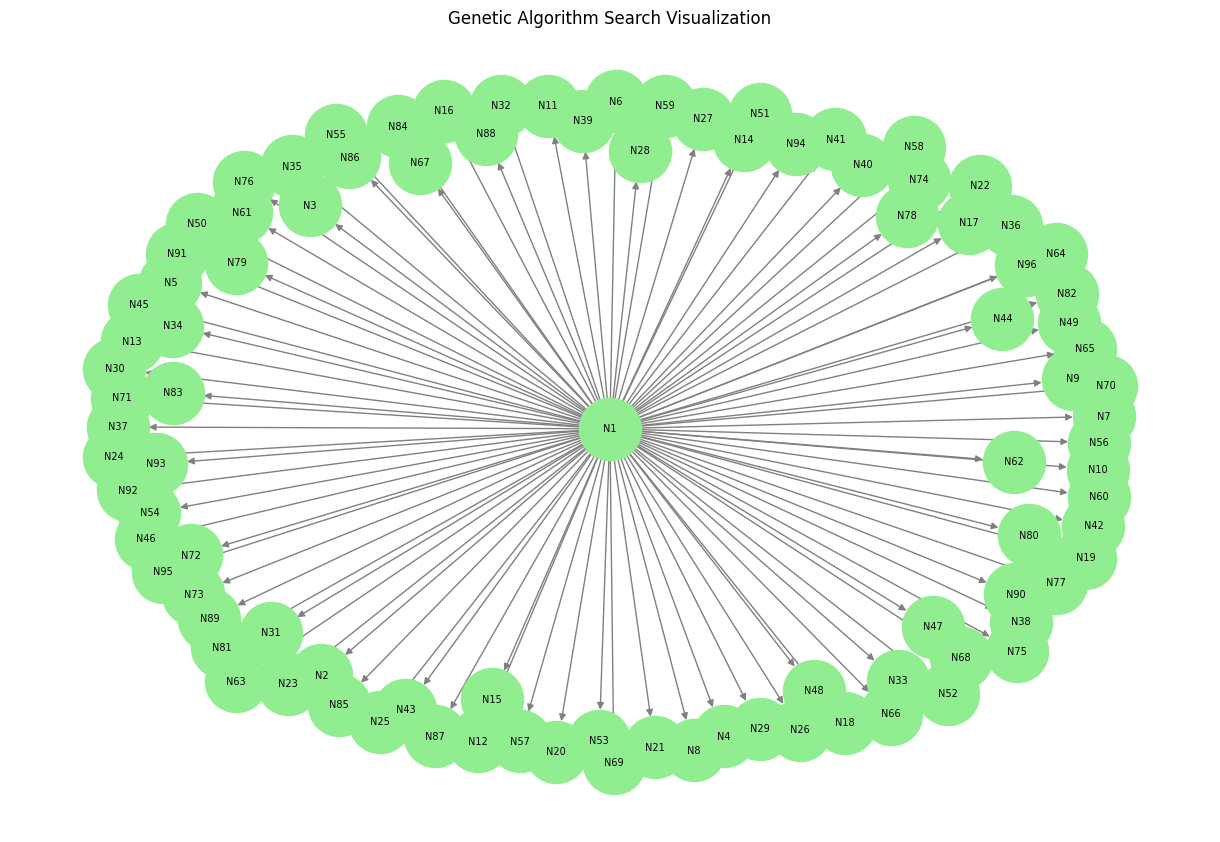

In [ ]:
import random
import math
import networkx as nx
import matplotlib.pyplot as plt


class NodeGeneticAlgorithm:
    def __init__(self, state):
        self.state = state

    def __lt__(self, other):
        pass

    @classmethod
    def root(cls, init_state):
        return cls(init_state)


def heuristic2(state):
    """
    A heuristic function to evaluate the conflicts in a Sudoku puzzle.
    This function counts the number of conflicts in rows, columns, and subgrids.
    Modify this based on the problem you're solving.
    """
    conflicts = 0
    size = len(state)
    subgrid_size = int(math.sqrt(size))

    # Row conflicts
    for row in state:
        conflicts += len(row) - len(set(row))  # Count repeated numbers

    # Column conflicts
    for col in range(size):
        column = [state[row][col] for row in range(size)]
        conflicts += len(column) - len(set(column))

    # Subgrid conflicts
    for i in range(0, size, subgrid_size):
        for j in range(0, size, subgrid_size):
            subgrid = [state[row][col] for row in range(i, i + subgrid_size) for col in range(j, j + subgrid_size)]
            conflicts += len(subgrid) - len(set(subgrid))

    return conflicts


class SudokuProblem:
    def __init__(self, init_state):
        self.init_state = init_state
        self.size = len(init_state)

    def actions(self, state):
        actions = []
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:  # Empty cell
                    for num in range(1, self.size + 1):
                        if self.is_valid_move(state, row, col, num):
                            actions.append((row, col, num))
        return actions

    def result(self, state, action):
        new_state = [row[:] for row in state]
        row, col, num = action
        new_state[row][col] = num
        return new_state

    def goal_test(self, state):
        for row in range(self.size):
            for col in range(self.size):
                if state[row][col] == 0:
                    return False
        return True

    def is_valid_move(self, state, row, col, num):
        if num in state[row]:
            return False
        if num in [state[r][col] for r in range(self.size)]:
            return False
        subgrid_size = int(math.sqrt(self.size))
        start_row, start_col = subgrid_size * (row // subgrid_size), subgrid_size * (col // subgrid_size)
        for r in range(start_row, start_row + subgrid_size):
            for c in range(start_col, start_col + subgrid_size):
                if state[r][c] == num:
                    return False
        return True


def genetic_algorithm_with_tracking(problem, population_size=100, mutation_rate=0.01, generations=1000):
    def initialize_population():
        population = []
        for _ in range(population_size):
            individual = [row[:] for row in problem.init_state]
            for row in range(problem.size):
                for col in range(problem.size):
                    if individual[row][col] == 0:
                        individual[row][col] = random.randint(1, 9)
            population.append(individual)
        return population

    def fitness(individual):
        conflicts = heuristic2(individual)
        return 1 / (1 + conflicts)

    def selection(population):
        weighted_population = [(fitness(individual), individual) for individual in population]
        total_weight = sum(weight for weight, _ in weighted_population)
        pick = random.uniform(0, total_weight)
        current = 0
        for weight, individual in weighted_population:
            current += weight
            if current > pick:
                return individual

    def crossover(parent1, parent2):
        point = random.randint(0, problem.size - 1)
        child = parent1[:point] + parent2[point:]
        return child

    def mutate(individual):
        for row in range(problem.size):
            if random.uniform(0, 1) < mutation_rate:
                col1, col2 = random.sample(range(problem.size), 2)
                individual[row][col1], individual[row][col2] = individual[row][col2], individual[row][col1]
        return individual

    population = initialize_population()
    search_tree = []

    for _ in range(generations):
        new_population = []
        for _ in range(population_size):
            parent1 = selection(population)
            parent2 = selection(population)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population
        for individual in population:
            search_tree.append((problem.init_state, individual))

        if any(problem.goal_test(individual) for individual in population):
            break

    best_individual = max(population, key=fitness)
    return best_individual if problem.goal_test(best_individual) else None, search_tree


def visualize_genetic_algorithm(problem):
    """
    Visualize the Genetic Algorithm search process and highlight the solution path.
    :param problem: An instance of the problem to solve.
    """
    result, search_tree = genetic_algorithm_with_tracking(problem)

    # Create directed graph for visualization
    G = nx.DiGraph()
    state_map = {}  # To map states to labels for visualization
    node_id = 1  # Counter for unique node IDs

    # Adding nodes and edges to the graph based on the search tree
    for parent_state, child_state in search_tree:
        parent_state_key = tuple(tuple(row) for row in parent_state)
        child_state_key = tuple(tuple(row) for row in child_state)

        if parent_state_key not in state_map:
            state_map[parent_state_key] = f"N{node_id}"
            node_id += 1
        if child_state_key not in state_map:
            state_map[child_state_key] = f"N{node_id}"
            node_id += 1

        G.add_edge(state_map[parent_state_key], state_map[child_state_key])

    # Draw the graph
    draw_graph(G)


def draw_graph(G):
    """
    Draw the graph with highlighted solution path.
    :param G: The graph to visualize.
    """
    # Draw the graph using networkx
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=7, node_color="lightgreen", edge_color="gray")
    plt.title("Genetic Algorithm Search Visualization")
    plt.show()


def main_visualize_genetic_algorithm():
    init_state = [
        [0, 2, 3, 0],
        [3, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]
    problem = SudokuProblem(init_state)
    visualize_genetic_algorithm(problem)


# Run Genetic Algorithm visualization
main_visualize_genetic_algorithm()


# Performance Comparison

In [ ]:
import time
import sys
import random
import heapq
import math

# Measure time and space, and record optimality and completeness
def compare_algorithms(problem):
    algorithms = [
        ("DFS", depth_first_search_with_tracking),
        #("UCS", uniform_cost_search_with_tracking),
        #("IDS", iterative_deepening_search_with_tracking),
        ("A*", lambda prob: a_star_search_with_tracking(prob, heuristic1)),
        ("Hill Climbing", hill_climbing_with_tracking),
        ("Simulated Annealing", simulated_annealing_with_tracking),
        ("Genetic Algorithm", genetic_algorithm_with_tracking),
    ]

    results = []

    for name, algorithm in algorithms:
        print(f"\nRunning {name} algorithm...")

        start_time = time.time()  # Start time measurement
        space_before = sys.getsizeof(problem)  # Space measurement before running the algorithm

        try:
            (actions, states), search_tree = algorithm(problem)
            end_time = time.time()  # End time measurement
            space_after = sys.getsizeof(problem)  # Space measurement after running the algorithm
        except Exception as e:
            print(f"Error running {name}: {e}")
            continue

        # Calculate time taken
        time_taken = end_time - start_time

        # Calculate space taken (difference before and after)
        space_taken = space_after - space_before

        # Check if the solution is optimal (assuming we have an optimal solution for comparison)
        is_optimal = check_optimality(problem, actions, states)

        # Check completeness
        is_complete = check_completeness(algorithm)

        # Store the results
        results.append({
            "Algorithm": name,
            "Time Taken (s)": time_taken,
            "Space Taken (bytes)": space_taken,
            "Optimality": "Optimal" if is_optimal else "Not Optimal",
            "Completeness": "Complete" if is_complete else "Incomplete"
        })

        # Print the results for the algorithm
        print(f"Time Taken: {time_taken:.5f} seconds")
        print(f"Space Taken: {space_taken} bytes")
        print(f"Optimality: {'Optimal' if is_optimal else 'Not Optimal'}")
        print(f"Completeness: {'Complete' if is_complete else 'Incomplete'}")

    # Display summary of results
    print("\nAlgorithm Comparison Summary:")
    for result in results:
        print(result)


# Optimality check: This can be based on the path cost (for the sake of simplicity, we assume the goal state is optimal)
def check_optimality(problem, actions, states):
    if problem.goal_test(states[-1]):
        # Compare with the best known solution cost if known (just an example, since this is a Sudoku problem)
        optimal_cost = 0  # Replace with actual optimal cost for problem, if known
        total_cost = len(actions)  # Example heuristic: number of actions

        # Check if the solution matches the optimal cost
        return total_cost == optimal_cost
    return False


# Completeness check: Some algorithms are not complete (e.g., hill climbing), others are
def check_completeness(algorithm):
    # Hill climbing and simulated annealing are not complete, so return False for them
    if algorithm in [hill_climbing_with_tracking, simulated_annealing_with_tracking]:
        return False
    return True


def main():
    # Define a small Sudoku problem
    init_state = [
        [0, 2, 3],
        [3, 0, 0],
        [0, 0, 0],
    ]
    problem = SudokuProblem(init_state)

    # Compare performance of different algorithms
    compare_algorithms(problem)

main()



Running DFS algorithm...
Error running DFS: 'SudokuProblem' object has no attribute 'step_cost'

Running A* algorithm...
Error running A*: 'SudokuProblem' object has no attribute 'step_cost'

Running Hill Climbing algorithm...
Time Taken: 0.00039 seconds
Space Taken: 0 bytes
Optimality: Not Optimal
Completeness: Incomplete

Running Simulated Annealing algorithm...
Time Taken: 0.00051 seconds
Space Taken: 0 bytes
Optimality: Not Optimal
Completeness: Incomplete

Running Genetic Algorithm algorithm...
Error running Genetic Algorithm: too many values to unpack (expected 2)

Algorithm Comparison Summary:
{'Algorithm': 'Hill Climbing', 'Time Taken (s)': 0.0003864765167236328, 'Space Taken (bytes)': 0, 'Optimality': 'Not Optimal', 'Completeness': 'Incomplete'}
{'Algorithm': 'Simulated Annealing', 'Time Taken (s)': 0.0005104541778564453, 'Space Taken (bytes)': 0, 'Optimality': 'Not Optimal', 'Completeness': 'Incomplete'}


Optimality
Definition: An algorithm is optimal if it always finds the best (minimum-cost) solution, assuming one exists.
A Optimality*: A* is optimal under certain conditions:
Admissibility: The heuristic function used by A* must be admissible, meaning it should never overestimate the true cost to reach the goal (i.e., the heuristic is a lower bound on the actual cost).
Consistency (or Monotonicity): If the heuristic is also consistent, meaning it satisfies the triangle inequality (the heuristic between any two states should be less than or equal to the cost of reaching a third state), A* will be both optimal and complete.
If these conditions hold, A* will always find the optimal solution.  

2. Completeness
Definition: An algorithm is complete if it is guaranteed to find a solution if one exists.
A Completeness*: A* is complete if the search space is finite and if the cost of actions is always positive (i.e., no negative-cost actions). If the cost of actions is non-negative, A* will eventually explore all possible paths and will find the goal if one exists.
To Summarize:
Optimality: A* is optimal if the heuristic is admissible and consistent.
Completeness: A* is complete if the search space is finite and the action costs are non-negative.